In [59]:
pip install --upgrade seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 326.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 300.4 kB/s eta 0:00:01
   ------------------- --

# Classification Problem:

Predict if a patient has diabetes based on health metrics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('C:/Users/siyal/Downloads/diabetes.csv') #Load

In [4]:
print(data.head()) # Show data

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Data Summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


A Pandas DataFrame with 768 rows and 9 columns, containing information about a diabetes dataset with features like pregnancies, glucose levels, BMI, and age, along with an "Outcome" column indicating the presence or absence of diabetes.

In [6]:
print(data.describe()) # key characteristics of data

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
print(data.isnull().sum()) # Looking for NaN 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
print(data.drop_duplicates()) # removing duplicates

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# Let's do some EDA and Visualization :

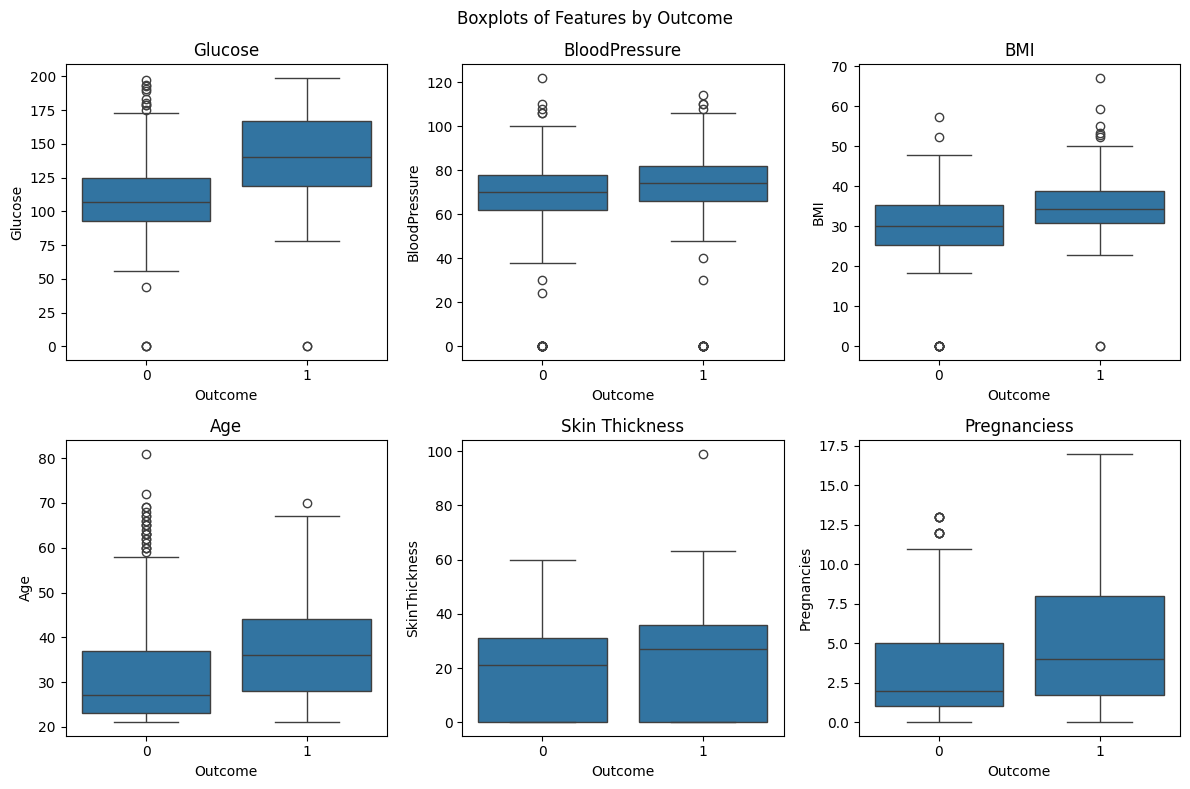

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each feature
fig, axes, = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Boxplots of Features by Outcome')

# Plot Glucose
sns.boxplot(ax=axes[0, 0], x='Outcome', y='Glucose', data=data)
axes[0, 0].set_title('Glucose')

# Plot BloodPressure
sns.boxplot(ax=axes[0, 1], x='Outcome', y='BloodPressure', data=data)
axes[0, 1].set_title('BloodPressure')

# Plot BMI
sns.boxplot(ax=axes[0, 2], x='Outcome', y='BMI', data=data)
axes[0, 2].set_title('BMI')

# Plot Age
sns.boxplot(ax=axes[1, 0], x='Outcome', y='Age', data=data)
axes[1, 0].set_title('Age')

# Plot Skin Thickness
sns.boxplot(ax=axes[1, 1], x='Outcome', y='SkinThickness', data=data)
axes[1, 1].set_title('Skin Thickness')

# Plot Skin Pregnancies
sns.boxplot(ax=axes[1, 2], x='Outcome', y='Pregnancies', data=data)
axes[1, 2].set_title('Pregnanciess')


plt.tight_layout()
plt.show()

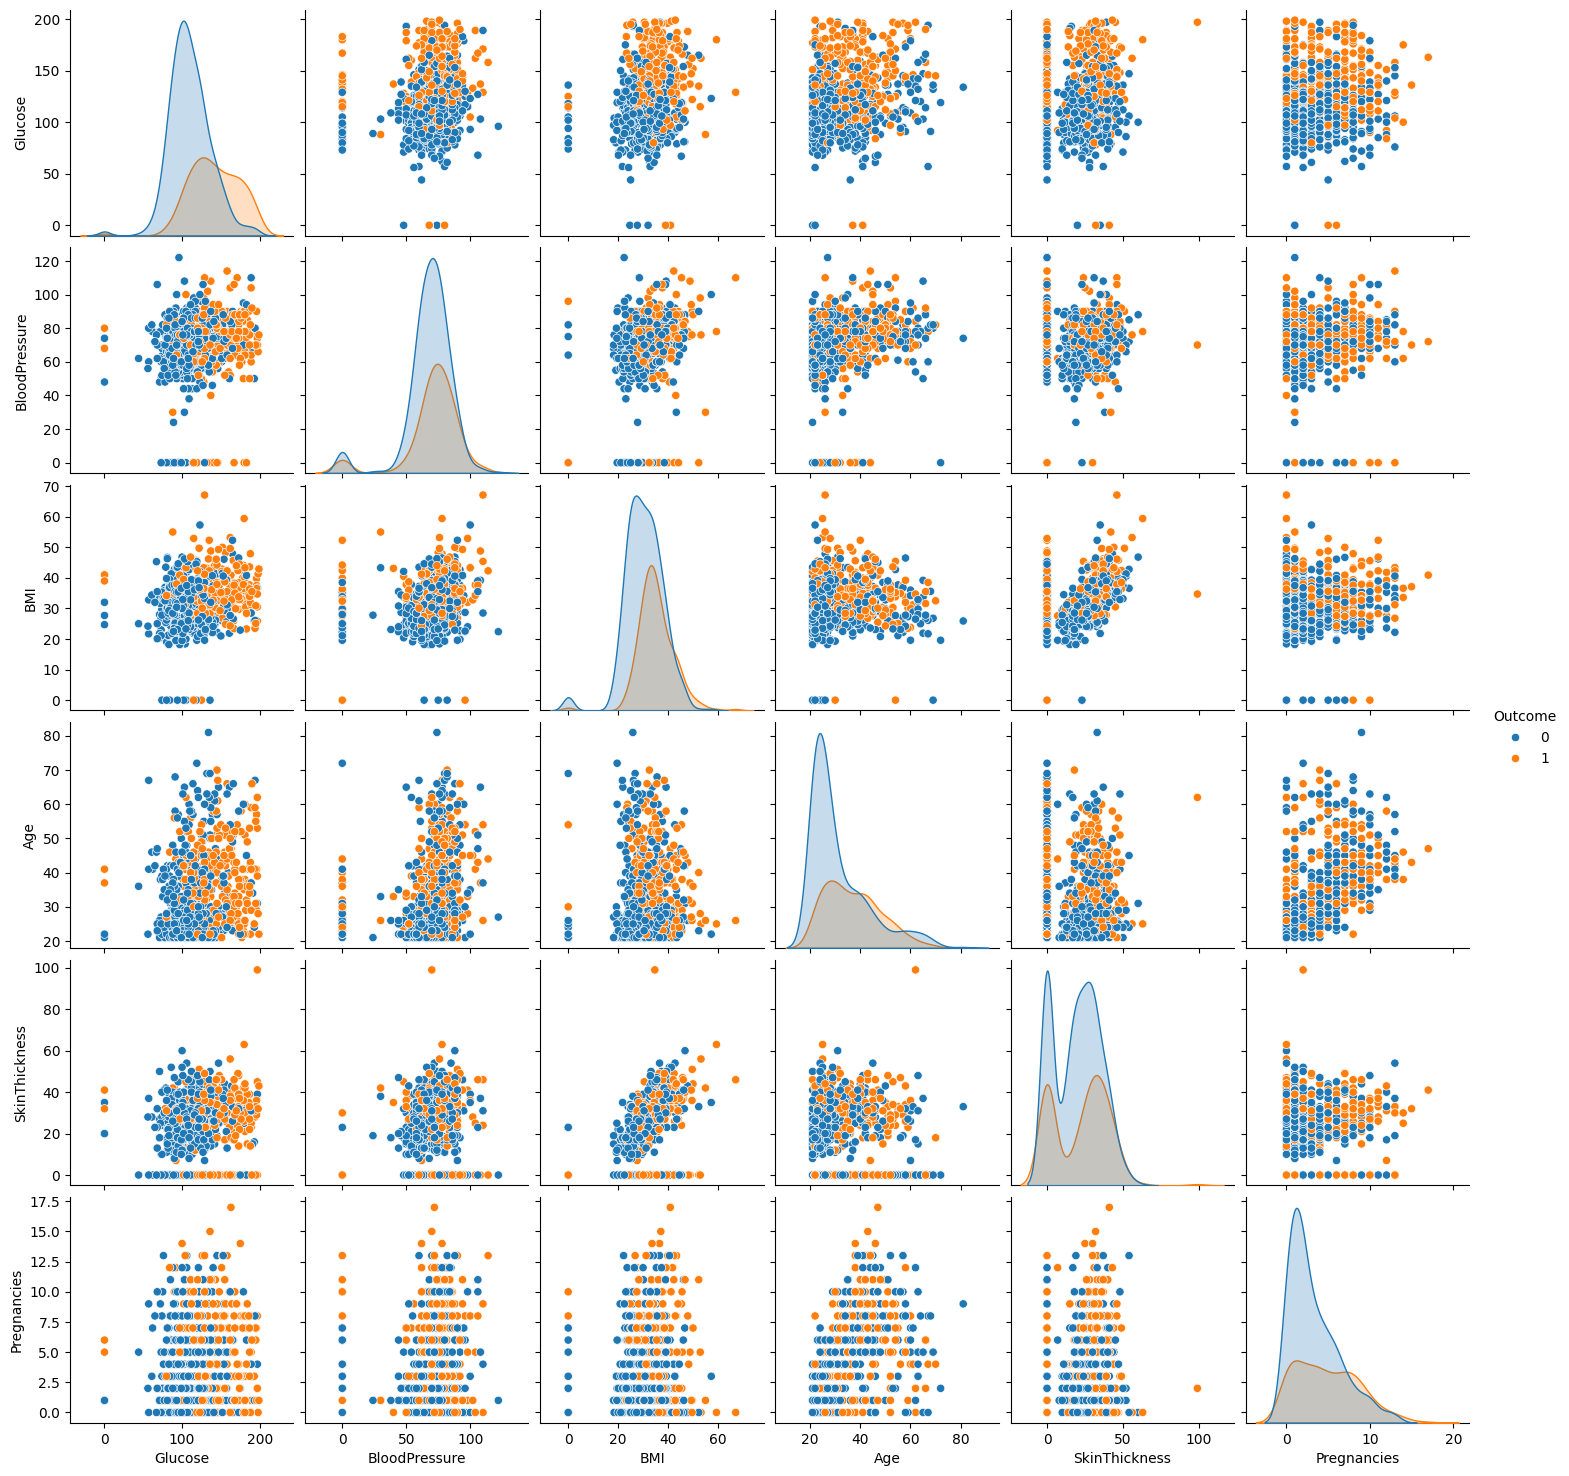

In [10]:
sns.pairplot(data[['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome', 'SkinThickness', 'Pregnancies']], hue='Outcome') 
plt.show()

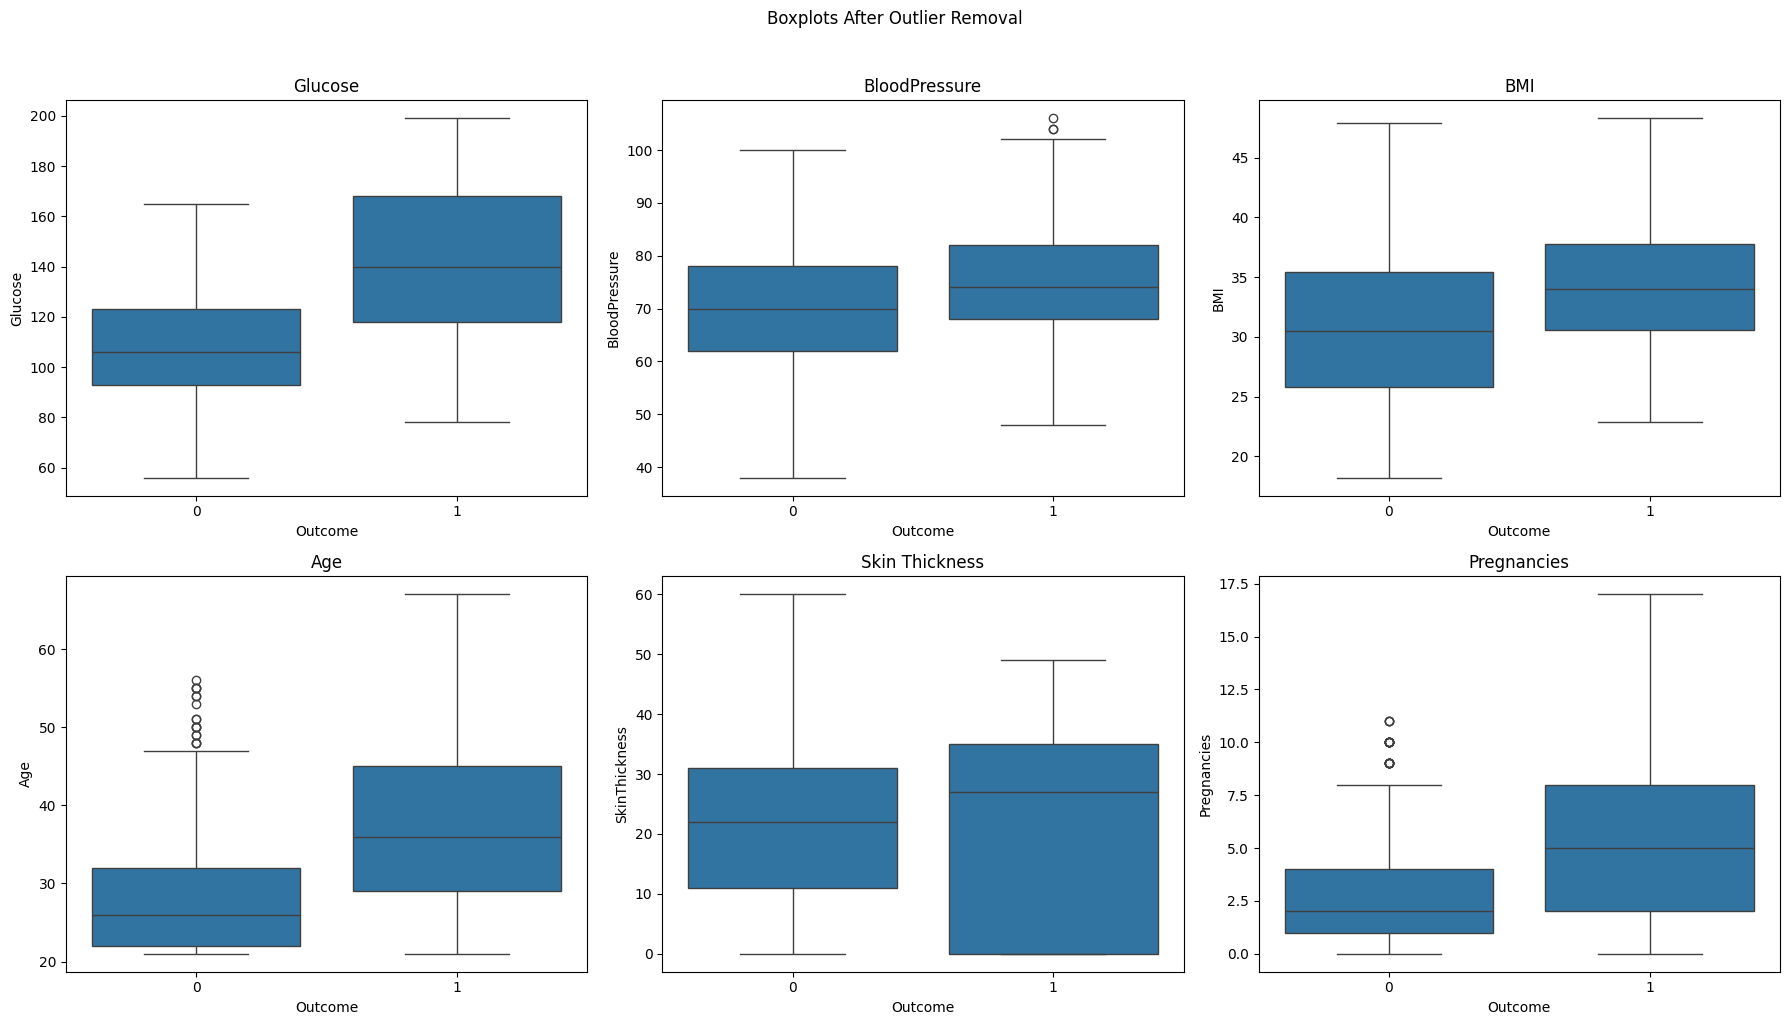

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------
# 1. Remove Outliers using IQR Method
# ----------------------------------
def remove_outliers(df, feature, outcome):
    # Filter data for specific outcome group
    group = df[df['Outcome'] == outcome]
    
    # Calculate IQR
    Q1 = group[feature].quantile(0.25)
    Q3 = group[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return filtered data
    return df[~((df['Outcome'] == outcome) & 
                ((df[feature] < lower_bound) | (df[feature] > upper_bound)))]

# Features to clean
features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'SkinThickness', 'Pregnancies']

# Apply outlier removal for each feature and outcome group
cleaned_data = data.copy()
for feature in features:
    for outcome in [0, 1]:  # Outcome groups
        cleaned_data = remove_outliers(cleaned_data, feature, outcome)

# --------------------------
# 2. Visualize Cleaned Data
# --------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots After Outlier Removal', y=1.02)

# Plot Glucose
sns.boxplot(ax=axes[0,0], x='Outcome', y='Glucose', data=cleaned_data)
axes[0,0].set_title('Glucose')

# Plot BloodPressure
sns.boxplot(ax=axes[0,1], x='Outcome', y='BloodPressure', data=cleaned_data)
axes[0,1].set_title('BloodPressure')

# Plot BMI
sns.boxplot(ax=axes[0,2], x='Outcome', y='BMI', data=cleaned_data)
axes[0,2].set_title('BMI')

# Plot Age
sns.boxplot(ax=axes[1,0], x='Outcome', y='Age', data=cleaned_data)
axes[1,0].set_title('Age')

# Plot SkinThickness
sns.boxplot(ax=axes[1,1], x='Outcome', y='SkinThickness', data=cleaned_data)
axes[1,1].set_title('Skin Thickness')

# Plot Pregnancies (fixed typo in title)
sns.boxplot(ax=axes[1,2], x='Outcome', y='Pregnancies', data=cleaned_data)
axes[1,2].set_title('Pregnancies')

plt.tight_layout()
plt.show()

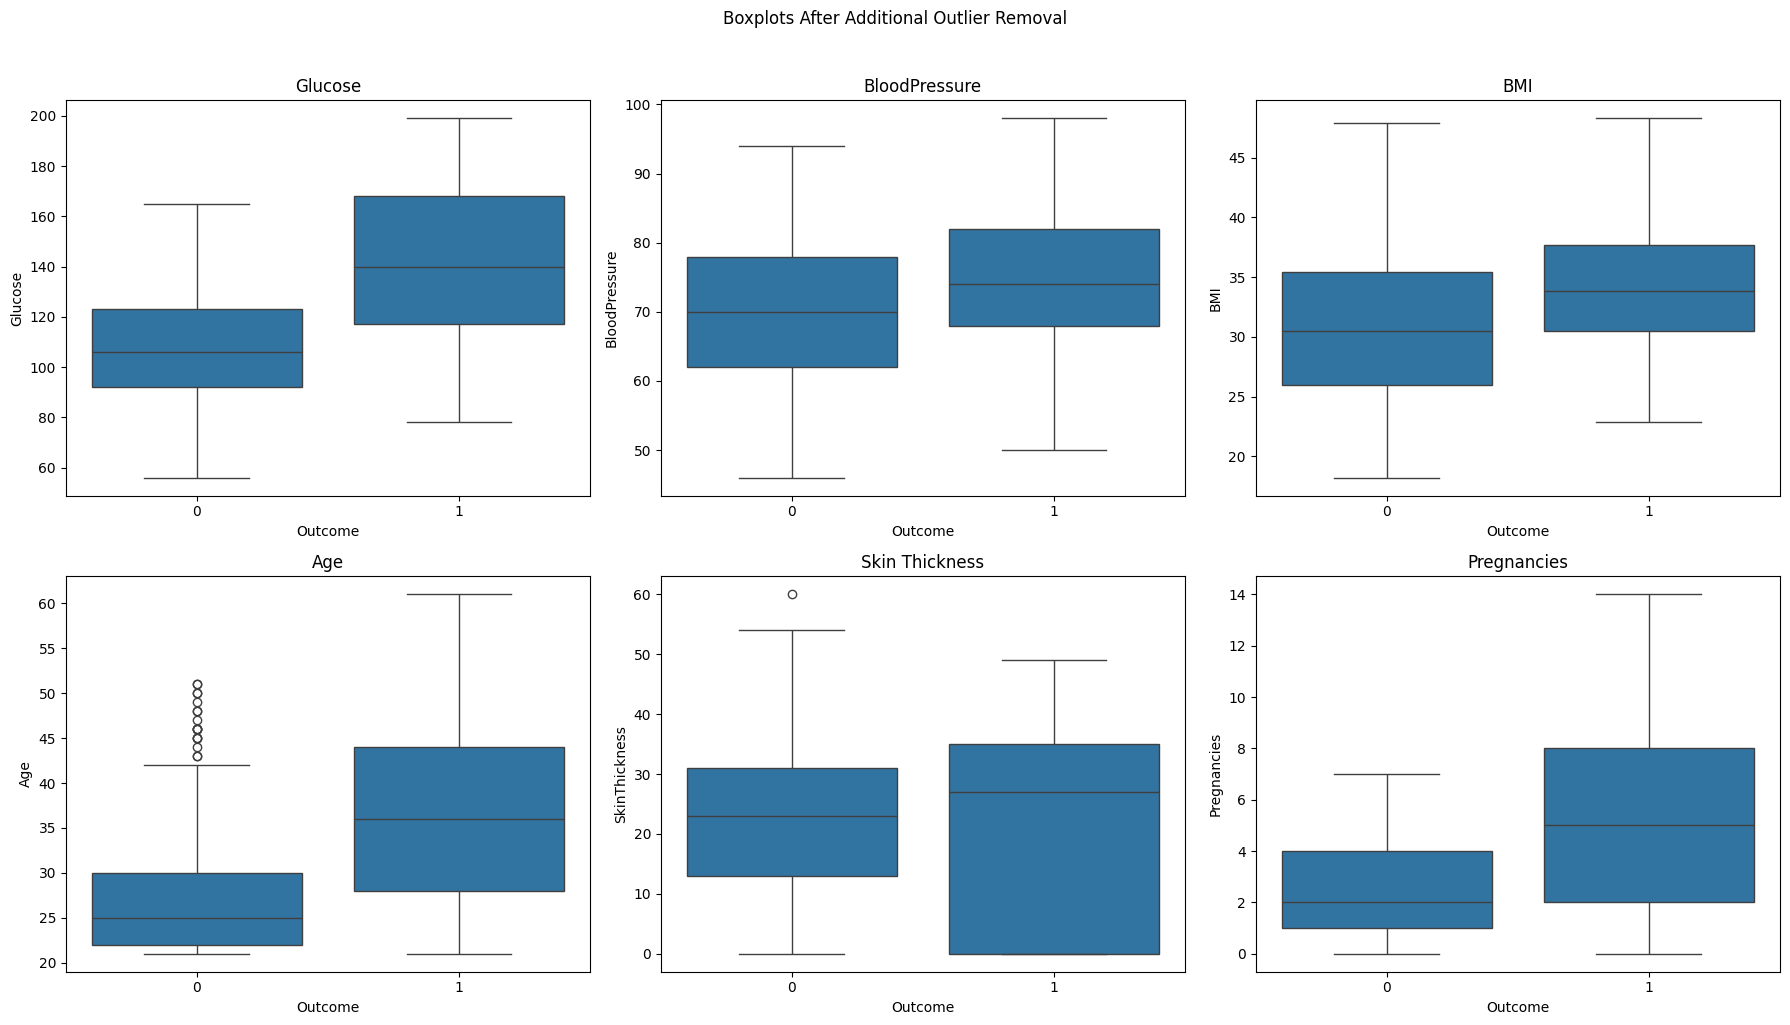

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------
# 1. Remove Outliers using IQR Method
# ----------------------------------
def remove_outliers(df, feature, outcome, multiplier=1.5):
    # Filter data for specific outcome group
    group = df[df['Outcome'] == outcome]
    
    # Calculate IQR
    Q1 = group[feature].quantile(0.25)
    Q3 = group[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Return filtered data
    return df[~((df['Outcome'] == outcome) & 
                ((df[feature] < lower_bound) | (df[feature] > upper_bound)))]

# Features to clean
features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'SkinThickness', 'Pregnancies']

# Apply outlier removal for each feature and outcome group
cleaned_data = data.copy()
for feature in features:
    for outcome in [0, 1]:  # Outcome groups
        if feature in ['Age', 'BloodPressure', 'Pregnancies']:
            # Use a stricter multiplier (e.g., 1.0) for these features
            cleaned_data = remove_outliers(cleaned_data, feature, outcome, multiplier=1.0)
        else:
            # Use default multiplier (1.5) for other features
            cleaned_data = remove_outliers(cleaned_data, feature, outcome)

# --------------------------
# 2. Visualize Cleaned Data
# --------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots After Additional Outlier Removal', y=1.02)

# Plot Glucose
sns.boxplot(ax=axes[0,0], x='Outcome', y='Glucose', data=cleaned_data)
axes[0,0].set_title('Glucose')

# Plot BloodPressure
sns.boxplot(ax=axes[0,1], x='Outcome', y='BloodPressure', data=cleaned_data)
axes[0,1].set_title('BloodPressure')

# Plot BMI
sns.boxplot(ax=axes[0,2], x='Outcome', y='BMI', data=cleaned_data)
axes[0,2].set_title('BMI')

# Plot Age
sns.boxplot(ax=axes[1,0], x='Outcome', y='Age', data=cleaned_data)
axes[1,0].set_title('Age')

# Plot SkinThickness
sns.boxplot(ax=axes[1,1], x='Outcome', y='SkinThickness', data=cleaned_data)
axes[1,1].set_title('Skin Thickness')

# Plot Pregnancies
sns.boxplot(ax=axes[1,2], x='Outcome', y='Pregnancies', data=cleaned_data)
axes[1,2].set_title('Pregnancies')

plt.tight_layout()
plt.show()

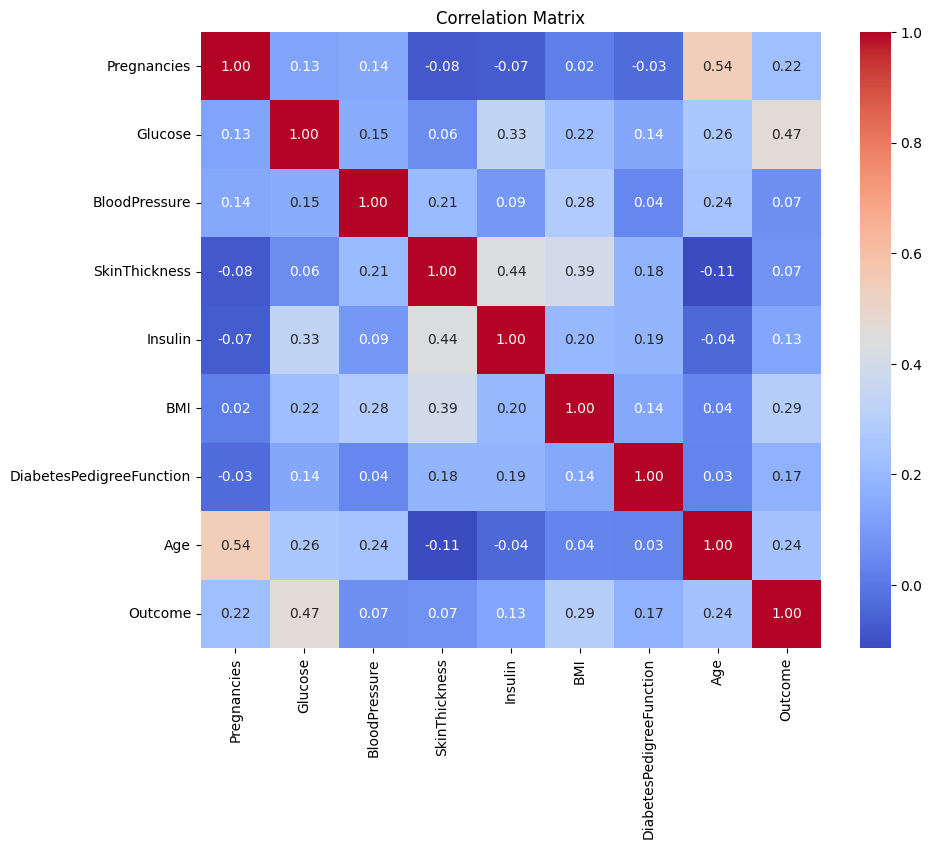

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [27]:
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [28]:
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

In [29]:
data['Glucose_Insulin_Ratio'] = data['Glucose'] / data['Insulin']

In [30]:
data['SkinThickness_BMI'] = data['SkinThickness'] * data['BMI']

In [31]:
data['Pregnancies_Age'] = data['Pregnancies'] * data['Age']

Encode Categorical Features:

In [32]:
data = pd.get_dummies(data, columns=['BMI_Category', 'Age_Group'], drop_first=True)

Feature Scaling:

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Replace infinite values with NaN
data_clean = data.replace([np.inf, -np.inf], np.nan)

# Handle NaN values (you can choose one of these approaches):
# Option 1: Drop rows with NaN values
data_clean = data_clean.dropna()

# Option 2: Replace NaN with median of the column
# data_clean = data_clean.fillna(data_clean.median())

# Now perform the scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean.drop('Outcome', axis=1))
X_scaled = pd.DataFrame(X_scaled, columns=data_clean.columns[:-1])
X_scaled['Outcome'] = data_clean['Outcome']

# Check which columns contain infinite values
inf_columns = data.isin([np.inf, -np.inf]).any()
print("Columns containing infinite values:")
print(inf_columns[inf_columns])

Columns containing infinite values:
Glucose_Insulin_Ratio    True
dtype: bool


In [38]:
# Calculate the non-infinite max value of the ratio
max_ratio = data['Glucose_Insulin_Ratio'][~np.isinf(data['Glucose_Insulin_Ratio'])].max()

# Replace infinite values with this max or some multiple of it
data['Glucose_Insulin_Ratio'] = data['Glucose_Insulin_Ratio'].replace([np.inf, -np.inf], max_ratio)

# Now perform the scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))
X_scaled = pd.DataFrame(X_scaled, columns=data.columns[:-1])
X_scaled['Outcome'] = data['Outcome']

In [40]:
inf_count = np.isinf(data['Glucose_Insulin_Ratio']).sum()
print(f"Number of infinite values: {inf_count}")

Number of infinite values: 0


# Logistics Regressi:

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# First handle the infinite values
max_ratio = data['Glucose_Insulin_Ratio'][~np.isinf(data['Glucose_Insulin_Ratio'])].max()
data['Glucose_Insulin_Ratio'] = data['Glucose_Insulin_Ratio'].replace([np.inf, -np.inf], max_ratio)

# Prepare X and y
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Create an imputer to handle NaN values (using median strategy)
imputer = SimpleImputer(strategy='median')

# Scale the features
scaler = StandardScaler()

# First impute the NaN values, then scale
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))

# Add cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Average CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
[[80 19]
 [19 36]]

Feature Importance:
                     Feature  Importance
1                    Glucose    1.081618
10           Pregnancies_Age    0.557265
0                Pregnancies    0.522267
14     Age_Group_Middle-aged    0.512050
11       BMI_Category_Normal    0.484986
15          Age_Group_Senior    0.351210
9          SkinThickness_BMI    0.345953
2              BloodPressure    0.288299
5                        BMI    0.282715
13        BMI_Category_Obese    0.254836
7                        Age    0.253676
6   DiabetesPedigreeFunction    0.221019
3              SkinThickness    0.220069
4               

Here is the concise summary of the provided information:

1. Model Evaluation Metrics:

    The classification model achieved an overall accuracy of 75%.
    Precision, recall, and F1-score for each class (0 and 1) are around 0.73 on average, indicating reasonable performance.

2. Feature Importance:

    'Glucose' is the most important feature in predicting the outcome. 
    Other important features include 'Pregnancies', 'Age',     'BMI', and 'SkinThickness'.

3. Cross-validation:

    The model was evaluated using 5-fold cross-validation.
    The average accuracy across the 5 folds is 0.776 with a standard deviation of 0.059.

# Let's USe Decision Tree: 

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Handle infinite values in Glucose_Insulin_Ratio
max_ratio = data['Glucose_Insulin_Ratio'][~np.isinf(data['Glucose_Insulin_Ratio'])].max()
data['Glucose_Insulin_Ratio'] = data['Glucose_Insulin_Ratio'].replace([np.inf, -np.inf], max_ratio)

# Prepare features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Print model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))

# Add cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt_model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Average CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.57      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154


Confusion Matrix:
[[76 23]
 [25 30]]

Feature Importance:
                     Feature  Importance
1                    Glucose    0.285334
5                        BMI    0.146330
6   DiabetesPedigreeFunction    0.131798
7                        Age    0.095949
10           Pregnancies_Age    0.084067
2              BloodPressure    0.080485
8      Glucose_Insulin_Ratio    0.049272
9          SkinThickness_BMI    0.033507
0                Pregnancies    0.031201
4                    Insulin    0.024495
3              SkinThickness    0.024035
14     Age_Group_Middle-aged    0.013528
11       BMI_Category_Normal    0.000000
12   BMI_Categor

Here is the concise Summary of the provided model evaluation metrics:

1. The model achieved an overall accuracy of 69% with precision, recall, and F1-score around 0.66 for both classes. Cross-validation scores show an average accuracy of 70.3% with a standard deviation of 0.083.

2. Feature importance analysis reveals 'Glucose' as the most influential feature, followed by 'BMI', 'DiabetesPedigreeFunction', and 'Age'.

This summary captures the essential information:

Model Performance: Overall accuracy, class-wise metrics, and cross-validation results.
Feature Importance: Highlights the most significant features for the model's predictions.

Comprehensive comparison of both models with Visualizations:

<Figure size 1200x600 with 0 Axes>

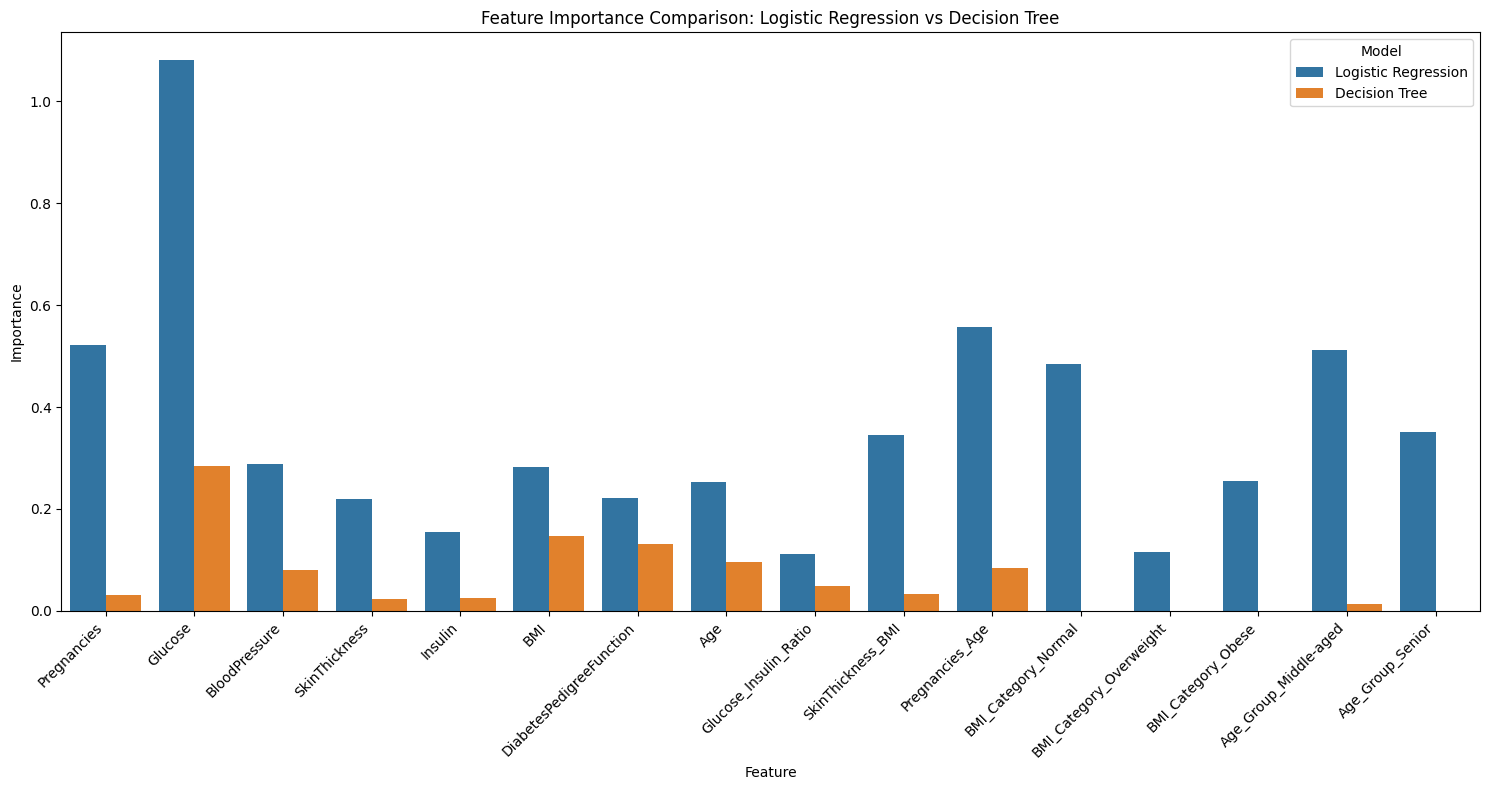

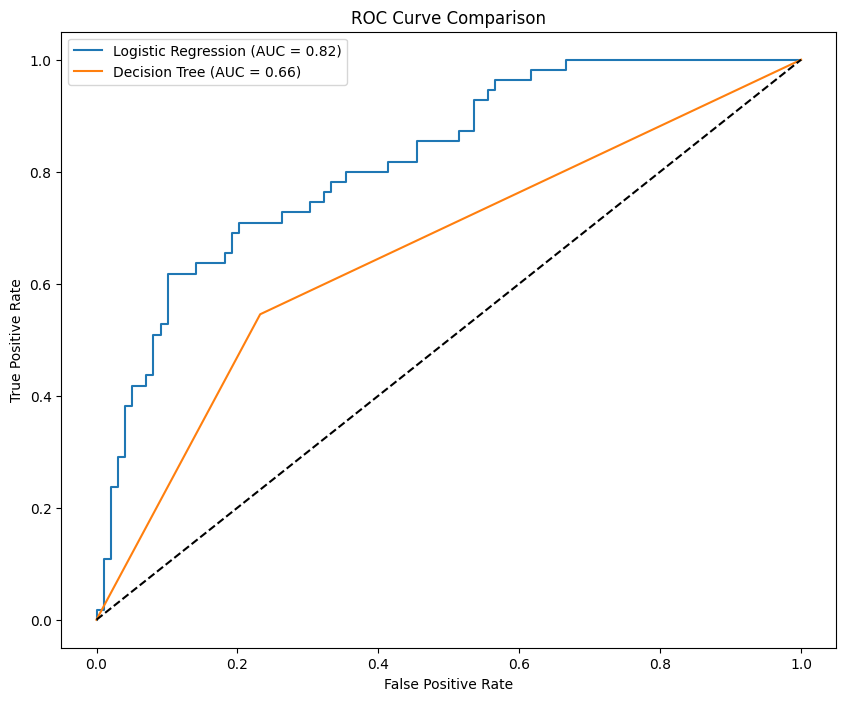

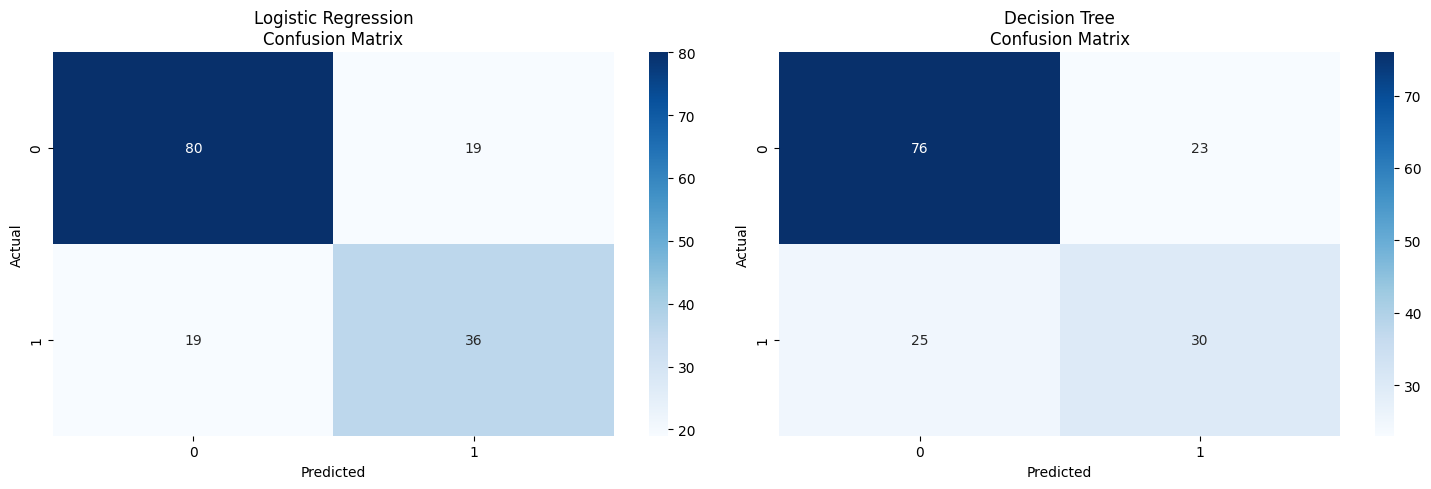

C:\Users\siyal\AppData\Local\Temp\ipykernel_8492\1521131930.py:116: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lr_cv_scores, dt_cv_scores], labels=['Logistic Regression', 'Decision Tree'])


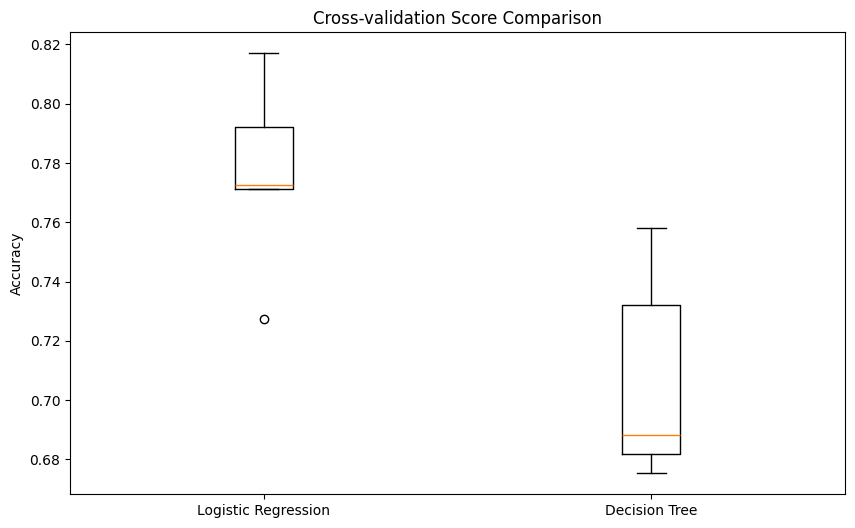


Model Performance Summary:
--------------------------------------------------
Logistic Regression:
Average CV Score: 0.776 (+/- 0.059)
AUC-ROC Score: 0.820

Decision Tree:
Average CV Score: 0.707 (+/- 0.065)
AUC-ROC Score: 0.657


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Data Preparation
# Handle infinite values
max_ratio = data['Glucose_Insulin_Ratio'][~np.isinf(data['Glucose_Insulin_Ratio'])].max()
data['Glucose_Insulin_Ratio'] = data['Glucose_Insulin_Ratio'].replace([np.inf, -np.inf], max_ratio)

# Prepare features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# For Logistic Regression: impute and scale
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
X_processed = scaler.fit_transform(imputer.fit_transform(X))
X_processed = pd.DataFrame(X_processed, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train both models
lr_model = LogisticRegression(random_state=42, max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)

lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Get predictions and probabilities
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Create visualization of feature importance comparison
plt.figure(figsize=(12, 6))

# Get feature importance for both models
lr_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(lr_model.coef_[0]),
    'Model': 'Logistic Regression'
})

dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_,
    'Model': 'Decision Tree'
})

# Combine feature importance
feature_importance = pd.concat([lr_importance, dt_importance])

# Plot feature importance comparison
plt.figure(figsize=(15, 8))
sns.barplot(data=feature_importance, x='Feature', y='Importance', hue='Model')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Comparison: Logistic Regression vs Decision Tree')
plt.tight_layout()
plt.show()

# ROC Curve Comparison
plt.figure(figsize=(10, 8))
# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# Calculate ROC curve for Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

# Plot ROC curves
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Confusion Matrix Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Logistic Regression\nConfusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('Decision Tree\nConfusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Cross-validation comparison
lr_cv_scores = cross_val_score(lr_model, X_processed, y, cv=5)
dt_cv_scores = cross_val_score(dt_model, X_processed, y, cv=5)

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot([lr_cv_scores, dt_cv_scores], labels=['Logistic Regression', 'Decision Tree'])
plt.title('Cross-validation Score Comparison')
plt.ylabel('Accuracy')
plt.show()

# Print summary statistics
print("\nModel Performance Summary:")
print("-" * 50)
print("Logistic Regression:")
print(f"Average CV Score: {lr_cv_scores.mean():.3f} (+/- {lr_cv_scores.std() * 2:.3f})")
print(f"AUC-ROC Score: {lr_auc:.3f}")

print("\nDecision Tree:")
print(f"Average CV Score: {dt_cv_scores.mean():.3f} (+/- {dt_cv_scores.std() * 2:.3f})")
print(f"AUC-ROC Score: {dt_auc:.3f}")